In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from __future__ import absolute_import, division, print_function

import re
import os
import sys
import datetime
import itertools
import warnings
import math

# deep learning
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model  

# data transforamtion and manipulation
import pandas as pd
import pandas_datareader.data as web
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
#from arch import arch_model

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# remove warnings
import warnings
warnings.filterwarnings('ignore')

# prevent crazy long pandas prints
pd.options.display.max_columns = 16
pd.options.display.max_rows = 16
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)

# Display and Plotting
import matplotlib.pyplot as plt
#set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 80
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 16, 8
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = False
#plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress

from IPython.display import set_matplotlib_formats, Image

Using TensorFlow backend.
C:\Users\DEDACAT1\AppData\Local\conda\conda\envs\python35\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Multilayer Perceptron

In [2]:
np.random.seed(7)

In [3]:
df = pd.read_csv('./data/passengers.csv', sep=';', parse_dates=True, index_col=0)
data = df.values
data = data.astype('float32')

In [4]:
train = data[0:120, :]
test = data[120:, :]

print(len(train), len(test))

120 24


In [7]:
def create_data_matrix(data, look_back=1):
    X_data, y_data = [], []
    for row in range(len(data) - look_back - 1):
        a = data[row:(row + look_back), 0]
        X_data.append(a)
        y_data.append(data[row + look_back, 0])
    return np.array(X_data), np.array(y_data)

In [8]:
look_back = 1
X_train, y_train = create_data_matrix(train, look_back)
X_test, y_test = create_data_matrix(test, look_back)

In [9]:
X_train

array([[ 112.],
       [ 118.],
       [ 132.],
       [ 129.],
       [ 121.],
       [ 135.],
       [ 148.],
       [ 148.],
       [ 136.],
       [ 119.],
       [ 104.],
       [ 118.],
       [ 115.],
       [ 126.],
       [ 141.],
       [ 135.],
       [ 125.],
       [ 149.],
       [ 170.],
       [ 170.],
       [ 158.],
       [ 133.],
       [ 114.],
       [ 140.],
       [ 145.],
       [ 150.],
       [ 178.],
       [ 163.],
       [ 172.],
       [ 178.],
       [ 199.],
       [ 199.],
       [ 184.],
       [ 162.],
       [ 146.],
       [ 166.],
       [ 171.],
       [ 180.],
       [ 193.],
       [ 181.],
       [ 183.],
       [ 218.],
       [ 230.],
       [ 242.],
       [ 209.],
       [ 191.],
       [ 172.],
       [ 194.],
       [ 196.],
       [ 196.],
       [ 236.],
       [ 235.],
       [ 229.],
       [ 243.],
       [ 264.],
       [ 272.],
       [ 237.],
       [ 211.],
       [ 180.],
       [ 201.],
       [ 204.],
       [ 188.],
       [

In [10]:
y_train

array([ 118.,  132.,  129.,  121.,  135.,  148.,  148.,  136.,  119.,
        104.,  118.,  115.,  126.,  141.,  135.,  125.,  149.,  170.,
        170.,  158.,  133.,  114.,  140.,  145.,  150.,  178.,  163.,
        172.,  178.,  199.,  199.,  184.,  162.,  146.,  166.,  171.,
        180.,  193.,  181.,  183.,  218.,  230.,  242.,  209.,  191.,
        172.,  194.,  196.,  196.,  236.,  235.,  229.,  243.,  264.,
        272.,  237.,  211.,  180.,  201.,  204.,  188.,  235.,  227.,
        234.,  264.,  302.,  293.,  259.,  229.,  203.,  229.,  242.,
        233.,  267.,  269.,  270.,  315.,  364.,  347.,  312.,  274.,
        237.,  278.,  284.,  277.,  317.,  313.,  318.,  374.,  413.,
        405.,  355.,  306.,  271.,  306.,  315.,  301.,  356.,  348.,
        355.,  422.,  465.,  467.,  404.,  347.,  305.,  336.,  340.,
        318.,  362.,  348.,  363.,  435.,  491.,  505.,  404.,  359.,  310.], dtype=float32)

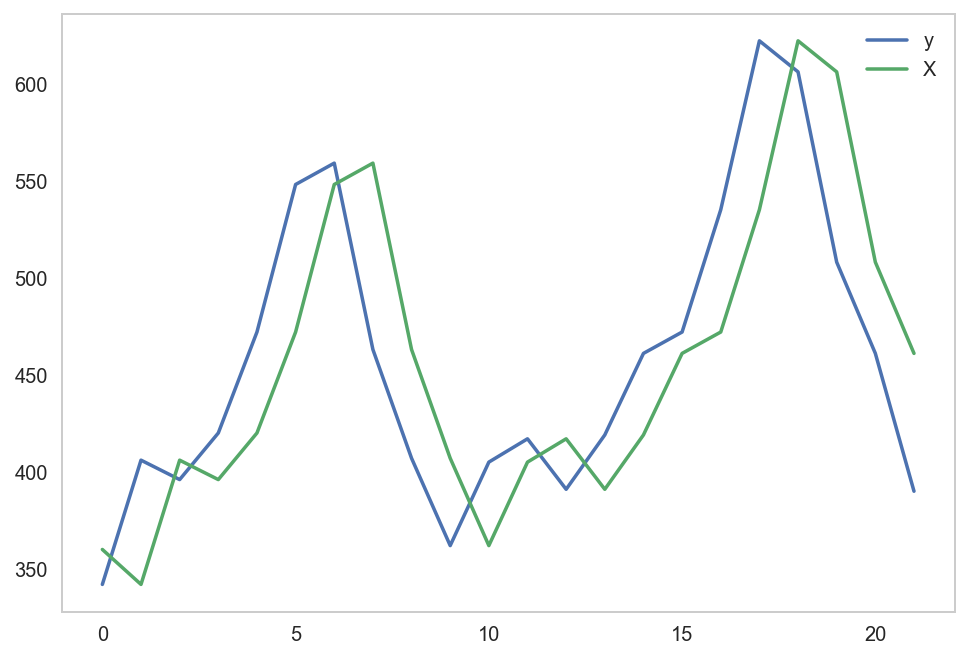

In [11]:
plt.plot(y_test, label='y')
plt.plot(X_test, label='X')
plt.legend()
plt.show()

In [12]:
# create and fit Multilayer Perceptron model
mdl = Sequential()
mdl.add(Dense(8, input_dim=look_back, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
0s - loss: 64464.1668
Epoch 2/200
0s - loss: 54678.5882
Epoch 3/200
0s - loss: 44610.0170
Epoch 4/200
0s - loss: 34449.9216
Epoch 5/200
0s - loss: 24869.5734
Epoch 6/200
0s - loss: 16621.6895
Epoch 7/200
0s - loss: 10192.8782
Epoch 8/200
0s - loss: 5839.5858
Epoch 9/200
0s - loss: 3186.6614
Epoch 10/200
0s - loss: 1821.6675
Epoch 11/200
0s - loss: 1201.5441
Epoch 12/200
0s - loss: 949.3259
Epoch 13/200
0s - loss: 861.4783
Epoch 14/200
0s - loss: 840.2338
Epoch 15/200
0s - loss: 829.5796
Epoch 16/200
0s - loss: 829.4167
Epoch 17/200
0s - loss: 829.8612
Epoch 18/200
0s - loss: 825.5637
Epoch 19/200
0s - loss: 826.1774
Epoch 20/200
0s - loss: 827.8880
Epoch 21/200
0s - loss: 831.7836
Epoch 22/200
0s - loss: 827.2403
Epoch 23/200
0s - loss: 826.7130
Epoch 24/200
0s - loss: 824.1511
Epoch 25/200
0s - loss: 825.6407
Epoch 26/200
0s - loss: 831.9014
Epoch 27/200
0s - loss: 824.5796
Epoch 28/200
0s - loss: 827.5417
Epoch 29/200
0s - loss: 830.5054
Epoch 30/200
0s - loss: 830.7236
E

In [13]:
# Estimate model performance
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 816.13 MSE (28.57 RMSE)
Test Score: 2799.36 MSE (52.91 RMSE)


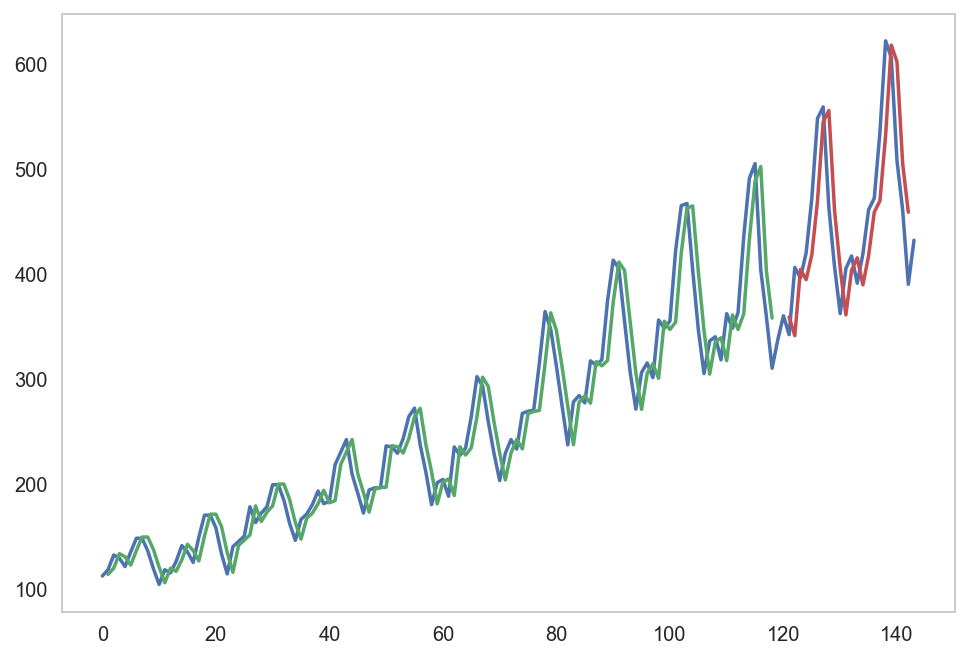

In [15]:
# generate predictions for training
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back: len(train_predict) + look_back, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict

# plot baseline and predictions
plt.plot(data);
plt.plot(train_predict_plot);
plt.plot(test_predict_plot);
plt.show()

## Multilayer perceptron with window

In [16]:
# reshape dataset
look_back = 3
X_train, y_train = create_data_matrix(train, look_back)
X_test, y_test = create_data_matrix(test, look_back)

In [17]:
# create and fit Multilayer Perceptron model
mdl = Sequential()
mdl.add(Dense(12, input_dim=look_back, activation='relu'))
mdl.add(Dense(8, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=400, batch_size=2, verbose=2)

Epoch 1/400
0s - loss: 3648.9279
Epoch 2/400
0s - loss: 1847.2007
Epoch 3/400
0s - loss: 1722.8158
Epoch 4/400
0s - loss: 1600.5873
Epoch 5/400
0s - loss: 1520.6649
Epoch 6/400
0s - loss: 1324.7288
Epoch 7/400
0s - loss: 1266.4954
Epoch 8/400
0s - loss: 1246.4324
Epoch 9/400
0s - loss: 1124.8561
Epoch 10/400
0s - loss: 1160.7469
Epoch 11/400
0s - loss: 1077.3516
Epoch 12/400
0s - loss: 1065.9995
Epoch 13/400
0s - loss: 983.3736
Epoch 14/400
0s - loss: 936.4449
Epoch 15/400
0s - loss: 904.3375
Epoch 16/400
0s - loss: 873.4901
Epoch 17/400
0s - loss: 872.4884
Epoch 18/400
0s - loss: 940.9042
Epoch 19/400
0s - loss: 894.2428
Epoch 20/400
0s - loss: 826.9503
Epoch 21/400
0s - loss: 772.7650
Epoch 22/400
0s - loss: 855.6814
Epoch 23/400
0s - loss: 813.1464
Epoch 24/400
0s - loss: 810.6847
Epoch 25/400
0s - loss: 781.3197
Epoch 26/400
0s - loss: 770.8263
Epoch 27/400
0s - loss: 809.4747
Epoch 28/400
0s - loss: 756.3856
Epoch 29/400
0s - loss: 797.9457
Epoch 30/400
0s - loss: 770.2956
Epoch 3

0s - loss: 815.9810
Epoch 249/400
0s - loss: 784.0576
Epoch 250/400
0s - loss: 726.7520
Epoch 251/400
0s - loss: 769.5572
Epoch 252/400
0s - loss: 752.5767
Epoch 253/400
0s - loss: 767.3308
Epoch 254/400
0s - loss: 708.5471
Epoch 255/400
0s - loss: 858.2542
Epoch 256/400
0s - loss: 759.7343
Epoch 257/400
0s - loss: 748.9167
Epoch 258/400
0s - loss: 738.4787
Epoch 259/400
0s - loss: 767.0263
Epoch 260/400
0s - loss: 771.7716
Epoch 261/400
0s - loss: 762.9354
Epoch 262/400
0s - loss: 731.4338
Epoch 263/400
0s - loss: 800.6729
Epoch 264/400
0s - loss: 739.3597
Epoch 265/400
0s - loss: 799.8243
Epoch 266/400
0s - loss: 724.4674
Epoch 267/400
0s - loss: 762.8318
Epoch 268/400
0s - loss: 743.2609
Epoch 269/400
0s - loss: 735.5015
Epoch 270/400
0s - loss: 750.9489
Epoch 271/400
0s - loss: 767.1306
Epoch 272/400
0s - loss: 733.0452
Epoch 273/400
0s - loss: 769.2425
Epoch 274/400
0s - loss: 777.3966
Epoch 275/400
0s - loss: 786.8178
Epoch 276/400
0s - loss: 787.8538
Epoch 277/400
0s - loss: 754

In [18]:
# Estimate model performance
train_score = mdl.evaluate(X_train, y_train, verbose=0)
print('Train Score: {:.2f} MSE ({:.2f} RMSE)'.format(train_score, math.sqrt(train_score)))
test_score = mdl.evaluate(X_test, y_test, verbose=0)
print('Test Score: {:.2f} MSE ({:.2f} RMSE)'.format(test_score, math.sqrt(test_score)))

Train Score: 680.65 MSE (26.09 RMSE)
Test Score: 2134.33 MSE (46.20 RMSE)


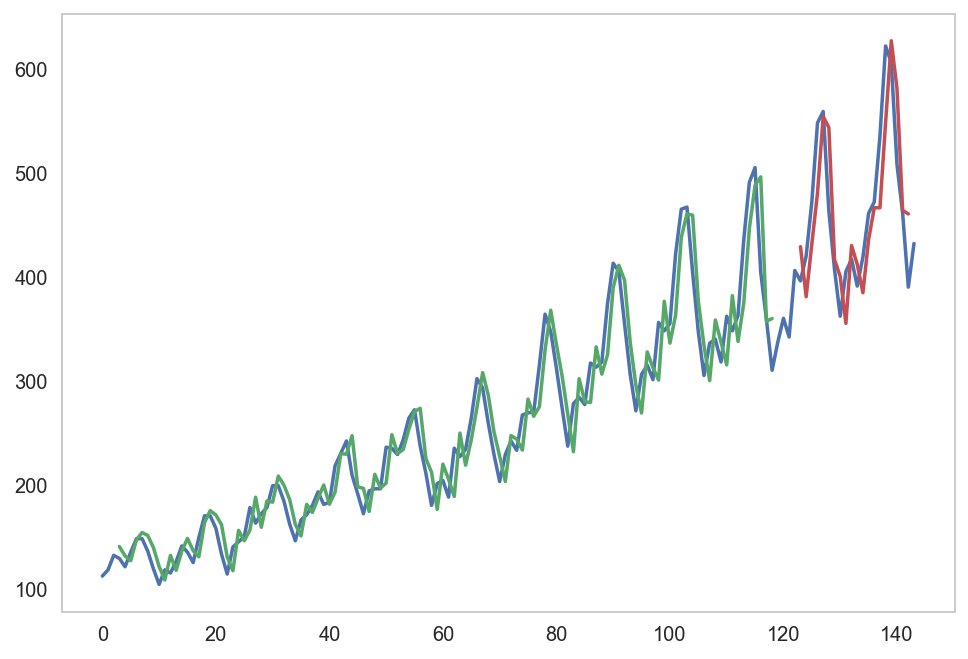

In [20]:
# generate predictions for training
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

# shift train predictions for plotting
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back: len(train_predict) + look_back, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back * 2)+1:len(data)-1, :] = test_predict

# plot baseline and predictions
plt.plot(data);
plt.plot(train_predict_plot);
plt.plot(test_predict_plot);
plt.show()